# FEATURES AND INFORMATIONS


* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# PACKAGES AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

#### WARNINGS

In [2]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# DATA

In [3]:
CustomerData = pd.read_csv("../input/customer-analytics/Train.csv")
# main

In [4]:
data = CustomerData.copy()
# to protect main

In [5]:
data.drop("ID",inplace=True,axis=1)

In [6]:
data.rename(columns={"Reached.on.Time_Y.N":"On_Time"},inplace=True)

In [7]:
df = data.select_dtypes(include=["float64","int64","int32"])
# for mathematical analysis, to guarantee even though it is not necessary

#### MAXIMUM VALUES OF SOME IMPORTANT COLUMNS

In [8]:
maxCostProduct = data[data["Cost_of_the_Product"] == data["Cost_of_the_Product"].max()]
maxPurchases = data[data["Prior_purchases"] == data["Prior_purchases"].max()]
maxWeight = data[data["Weight_in_gms"] == data["Weight_in_gms"].max()]

#### MINIMUM VALUES OF SOME IMPORTANT COLUMNS

In [9]:
minCostProduct = data[data["Cost_of_the_Product"] == data["Cost_of_the_Product"].min()]
minPurchases = data[data["Prior_purchases"] == data["Prior_purchases"].min()]
minWeight = data[data["Weight_in_gms"] == data["Weight_in_gms"].min()]

# EXPLORATORY DATA ANALYSIS

In [10]:
print(data.head())

  Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  On_Time  
0                44           1233        1  
1                59           3088  

In [11]:
print(data.shape)

(10999, 11)


In [12]:
print(data.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'On_Time'],
      dtype='object')


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  On_Time              10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB
None


In [14]:
print(data.describe().T)

                       count         mean          std     min     25%  \
Customer_care_calls  10999.0     4.054459     1.141490     2.0     3.0   
Customer_rating      10999.0     2.990545     1.413603     1.0     2.0   
Cost_of_the_Product  10999.0   210.196836    48.063272    96.0   169.0   
Prior_purchases      10999.0     3.567597     1.522860     2.0     3.0   
Discount_offered     10999.0    13.373216    16.205527     1.0     4.0   
Weight_in_gms        10999.0  3634.016729  1635.377251  1001.0  1839.5   
On_Time              10999.0     0.596691     0.490584     0.0     0.0   

                        50%     75%     max  
Customer_care_calls     4.0     5.0     7.0  
Customer_rating         3.0     4.0     5.0  
Cost_of_the_Product   214.0   251.0   310.0  
Prior_purchases         3.0     4.0    10.0  
Discount_offered        7.0    10.0    65.0  
Weight_in_gms        4149.0  5050.0  7846.0  
On_Time                 1.0     1.0     1.0  


In [15]:
print(data.corr())

                     Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.012209   
Customer_rating                 0.012209         1.000000   
Cost_of_the_Product             0.323182         0.009270   
Prior_purchases                 0.180771         0.013179   
Discount_offered               -0.130750        -0.003124   
Weight_in_gms                  -0.276615        -0.001897   
On_Time                        -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000         0.123676         -0.138312   
Prior_purchases                 0.123676         1.000000         -0.082769   
Discount_offered               -0.138312        -0.082769          1.000000   
Weight_in_gms                  -0.132

In [16]:
print(data.cov())

                     Customer_care_calls  Customer_rating  \
Customer_care_calls             1.302999         0.019700   
Customer_rating                 0.019700         1.998274   
Cost_of_the_Product            17.730960         0.629794   
Prior_purchases                 0.314240         0.028372   
Discount_offered               -2.418672        -0.071575   
Weight_in_gms                -516.375888        -4.385094   
On_Time                        -0.037590         0.009098   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Customer_care_calls            17.730960         0.314240         -2.418672   
Customer_rating                 0.629794         0.028372         -0.071575   
Cost_of_the_Product          2310.078091         9.052296       -107.729679   
Prior_purchases                 9.052296         2.319103         -2.042643   
Discount_offered             -107.729679        -2.042643        262.619108   
Weight_in_gms              -10422.887

In [17]:
print(data.groupby(["On_Time"])["Prior_purchases"].mean())

On_Time
0    3.670424
1    3.498095
Name: Prior_purchases, dtype: float64


In [18]:
print(data.groupby(["On_Time"])["Cost_of_the_Product"].mean())

On_Time
0    214.498647
1    207.289197
Name: Cost_of_the_Product, dtype: float64


In [19]:
print(data.groupby(["On_Time"])["Customer_rating"].mean())

On_Time
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64


In [20]:
print(data.groupby(["On_Time"])["Discount_offered"].mean())

On_Time
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64


In [21]:
print(data.groupby(["On_Time"])["Weight_in_gms"].mean())

On_Time
0    4168.668395
1    3272.640104
Name: Weight_in_gms, dtype: float64


In [22]:
print(data.groupby(["On_Time","Mode_of_Shipment"])["Prior_purchases"].mean())

On_Time  Mode_of_Shipment
0        Flight              3.738701
         Road                3.689655
         Ship                3.649684
1        Flight              3.452760
         Road                3.505314
         Ship                3.507289
Name: Prior_purchases, dtype: float64


In [23]:
print(data.groupby(["On_Time","Mode_of_Shipment"])["Cost_of_the_Product"].mean())

On_Time  Mode_of_Shipment
0        Flight              213.408192
         Road                215.394483
         Ship                214.539461
1        Flight              206.590271
         Road                207.029952
         Ship                207.516932
Name: Cost_of_the_Product, dtype: float64


In [24]:
print(data.groupby(["On_Time","Mode_of_Shipment"])["Customer_rating"].mean())

On_Time  Mode_of_Shipment
0        Flight              2.975989
         Road                2.988966
         Ship                2.961039
1        Flight              2.986904
         Road                3.000000
         Ship                3.011662
Name: Customer_rating, dtype: float64


In [25]:
print(data.groupby(["On_Time","Mode_of_Shipment"])["Discount_offered"].mean())

On_Time  Mode_of_Shipment
0        Flight               5.528249
         Road                 5.466207
         Ship                 5.569431
1        Flight              18.216090
         Road                18.420290
         Ship                18.827540
Name: Discount_offered, dtype: float64


In [26]:
print(data.groupby(["On_Time","Mode_of_Shipment"])["Weight_in_gms"].mean())

On_Time  Mode_of_Shipment
0        Flight              4116.878531
         Road                4122.776552
         Ship                4191.958042
1        Flight              3306.506080
         Road                3318.063768
         Ship                3253.977573
Name: Weight_in_gms, dtype: float64


In [27]:
print(data.groupby(["On_Time","Warehouse_block"])["Prior_purchases"].mean())

On_Time  Warehouse_block
0        A                  3.630607
         B                  3.758573
         C                  3.607578
         D                  3.772358
         F                  3.627717
1        A                  3.540465
         B                  3.453804
         C                  3.519196
         D                  3.487226
         F                  3.494531
Name: Prior_purchases, dtype: float64


In [28]:
print(data.groupby(["On_Time","Warehouse_block"])["Cost_of_the_Product"].mean())

On_Time  Warehouse_block
0        A                  214.216359
         B                  216.736626
         C                  214.654939
         D                  214.563686
         F                  213.424592
1        A                  204.925581
         B                  209.136775
         C                  208.851920
         D                  208.446168
         F                  206.160438
Name: Cost_of_the_Product, dtype: float64


In [29]:
print(data.groupby(["On_Time","Warehouse_block"])["Customer_rating"].mean())

On_Time  Warehouse_block
0        A                  2.930079
         B                  2.980796
         C                  2.956698
         D                  3.033875
         F                  2.953804
1        A                  2.976744
         B                  2.980072
         C                  3.019196
         D                  3.007299
         F                  3.025524
Name: Customer_rating, dtype: float64


In [30]:
print(data.groupby(["On_Time","Warehouse_block"])["Discount_offered"].mean())

On_Time  Warehouse_block
0        A                   5.526385
         B                   5.577503
         C                   5.430311
         D                   5.604336
         F                   5.569293
1        A                  18.649302
         B                  18.211957
         C                  18.783364
         D                  18.136861
         F                  19.101641
Name: Discount_offered, dtype: float64


In [31]:
print(data.groupby(["On_Time","Warehouse_block"])["Weight_in_gms"].mean())

On_Time  Warehouse_block
0        A                  4140.250660
         B                  4183.167353
         C                  4177.474966
         D                  4130.554201
         F                  4190.809103
1        A                  3245.402791
         B                  3274.194746
         C                  3279.164534
         D                  3291.018248
         F                  3272.769371
Name: Weight_in_gms, dtype: float64


In [32]:
maxWeight["On_Time"].value_counts()

1    1
Name: On_Time, dtype: int64

In [33]:
maxCostProduct["On_Time"].value_counts()

0    10
1     7
Name: On_Time, dtype: int64

In [34]:
maxPurchases["On_Time"].value_counts()

1    102
0     76
Name: On_Time, dtype: int64

In [35]:
minWeight["On_Time"].value_counts()

1    2
0    1
Name: On_Time, dtype: int64

In [36]:
minCostProduct["On_Time"].value_counts()

1    5
Name: On_Time, dtype: int64

In [37]:
minPurchases["On_Time"].value_counts()

1    1625
0     974
Name: On_Time, dtype: int64

In [38]:
print(data["On_Time"].value_counts())

1    6563
0    4436
Name: On_Time, dtype: int64


In [39]:
print(data["Warehouse_block"].value_counts())

F    3666
D    1834
B    1833
A    1833
C    1833
Name: Warehouse_block, dtype: int64


In [40]:
print(data["Mode_of_Shipment"].value_counts())

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64


In [41]:
print(data.duplicated().sum())

0


In [42]:
print(data.isnull().all())

Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
On_Time                False
dtype: bool


In [43]:
print(data.isnull().sum())

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
On_Time                0
dtype: int64


# CORRELATION - COVARIANCE - NORMALITY - HOMOGENEITY

#### CORRELATION TYPE

In [44]:
corrPearson = data.corr(method="pearson")

In [45]:
corrSpearman = data.corr(method="spearman")

#### CORRELATION VISUALIZATION

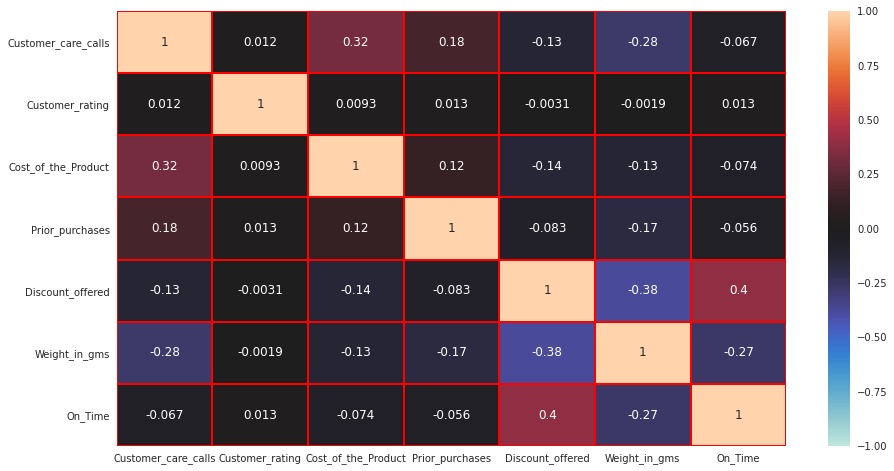

In [46]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrPearson,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="red")
plt.show()

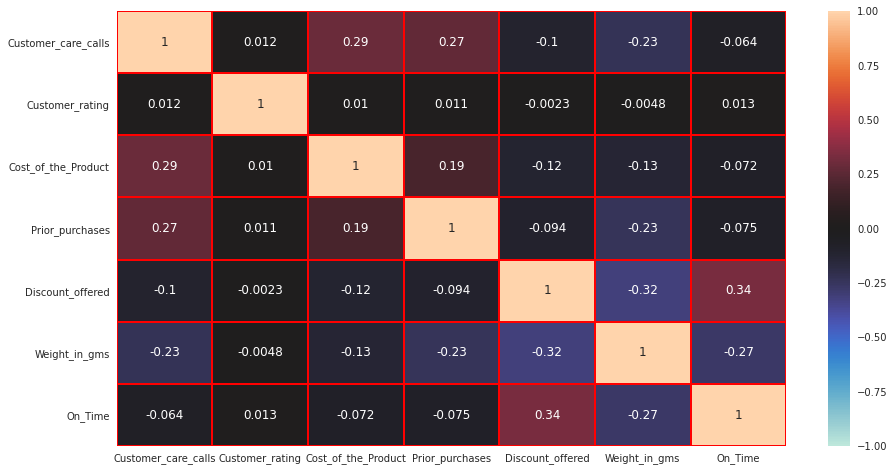

In [47]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrSpearman,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="red")
plt.show()

#### CORRELATION BETWEEN SOME FEATURES

In [48]:
print(data["On_Time"].corr(data["Customer_rating"],method="pearson"))
print(data["On_Time"].corr(data["Customer_rating"],method="spearman"))

0.013118604264753442
0.013108057107647446


In [49]:
print(data["On_Time"].corr(data["Cost_of_the_Product"],method="pearson"))
print(data["On_Time"].corr(data["Cost_of_the_Product"],method="spearman"))

-0.07358721059030128
-0.07185043379286801


#### COVARIANCE

In [50]:
covariance = data.cov()

#### COVARIANCE VISUALIZATION

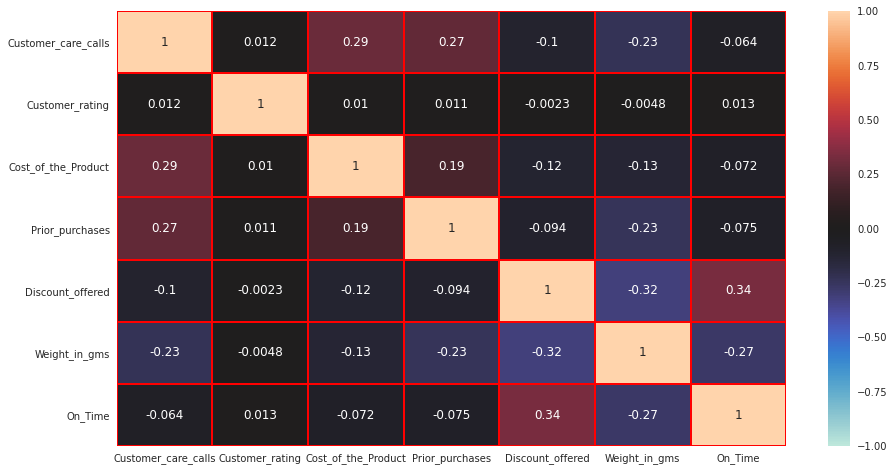

In [51]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrSpearman,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="red")
plt.show()

#### NORMALITY

In [52]:
for i in df.columns:
    print(i)
    print("---"*5)
    print("%.4f - %.4f" % shapiro(data[i]))
    print("---"*15)

Customer_care_calls
---------------
0.9180 - 0.0000
---------------------------------------------
Customer_rating
---------------
0.8882 - 0.0000
---------------------------------------------
Cost_of_the_Product
---------------
0.9725 - 0.0000
---------------------------------------------
Prior_purchases
---------------
0.8183 - 0.0000
---------------------------------------------
Discount_offered
---------------
0.6889 - 0.0000
---------------------------------------------
Weight_in_gms
---------------
0.8976 - 0.0000
---------------------------------------------
On_Time
---------------
0.6230 - 0.0000
---------------------------------------------


#### HOMOGENEITY

In [53]:
print("%.4f - %.4f" % levene(data["Cost_of_the_Product"],data["Customer_rating"],
                            data["Discount_offered"],data["On_Time"]))

19674.4067 - 0.0000


In [54]:
print("%.4f - %.4f" % levene(data["Cost_of_the_Product"],data["On_Time"]))

29871.8239 - 0.0000


In [55]:
print("%.4f - %.4f" % levene(data["Customer_rating"],data["On_Time"]))

8596.2919 - 0.0000


In [56]:
print("%.4f - %.4f" % levene(data["Discount_offered"],data["On_Time"]))

4351.4195 - 0.0000


# ENCODE

In [57]:
encode = LabelEncoder()

In [58]:
objectcolumns = data.select_dtypes(include=["object"])
print(objectcolumns.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [59]:
for a in objectcolumns:
    data[a] = encode.fit_transform(data[a])

In [60]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  On_Time              10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB
None


# OUTLIER

In [61]:
DataForA = data.copy()
# to protect main

In [62]:
clf = LocalOutlierFactor()

In [63]:
clf.fit_predict(DataForA)

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
score = clf.negative_outlier_factor_

In [65]:
scoreSorted = np.sort(score)

In [66]:
print(scoreSorted[0:50])
# checking outlier, look where the biggest jump took place
# we can identify 6.index as point

[-49.23420001 -45.83305039 -44.90793785 -43.80881891 -39.87437401
 -23.44503825  -4.7196879   -3.42435176  -3.37610349  -3.20090154
  -3.06223813  -2.86920018  -2.78754054  -2.74096165  -2.5840874
  -2.53241128  -2.51965873  -2.49954423  -2.45206587  -2.22651546
  -2.19794237  -2.14941097  -2.08814005  -2.07886447  -2.05597358
  -2.04131007  -1.85543019  -1.81595265  -1.79030482  -1.78492262
  -1.78367328  -1.78196285  -1.74562079  -1.72837548  -1.71070166
  -1.70775564  -1.69162048  -1.68935852  -1.68902088  -1.68238855
  -1.67774099  -1.66262386  -1.63914729  -1.63399915  -1.63292157
  -1.63241874  -1.62371866  -1.62080133  -1.61929576  -1.61737996]


In [67]:
point = scoreSorted[6]
print(point)
print("---"*10)
print(DataForA[score == point])

-4.7196878981741435
------------------------------
     Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
251                4                 1                    2                2   

     Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
251                  145                3                   2       0   

     Discount_offered  Weight_in_gms  On_Time  
251                 5           6102        1  


In [68]:
outliers = score < point
print(data[outliers])
print("---"*20)
print(data[outliers].index)

     Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
198                3                 2                    2                3   
199                4                 2                    2                2   
205                4                 2                    2                3   
213                1                 2                    2                5   
245                4                 2                    2                4   
257                4                 1                    2                2   

     Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
198                  142                3                   2       0   
199                  154                3                   2       1   
205                  145                3                   2       0   
213                  160                3                   2       0   
245                  154                3                   2       0   
2

#### DELETING

In [69]:
outliersIndexList = [data[outliers].index]
print(type(outliersIndexList))

<class 'list'>


In [70]:
for d in outliersIndexList:
    data.drop(index=d,inplace=True)

# VISUALIZATION

In [71]:
dataVis = data.copy()
# to protect main

In [72]:
dataVis["Customer_rating"] = pd.Categorical(dataVis["Customer_rating"])
dataVis["Product_importance"] = pd.Categorical(dataVis["Product_importance"])
dataVis["Gender"] = pd.Categorical(dataVis["Gender"])
dataVis["On_Time"] = pd.Categorical(dataVis["On_Time"])
dataVis["Warehouse_block"] = pd.Categorical(dataVis["Warehouse_block"])
dataVis["Mode_of_Shipment"] = pd.Categorical(dataVis["Mode_of_Shipment"])
dataVis["Customer_care_calls"] = pd.Categorical(dataVis["Customer_care_calls"])

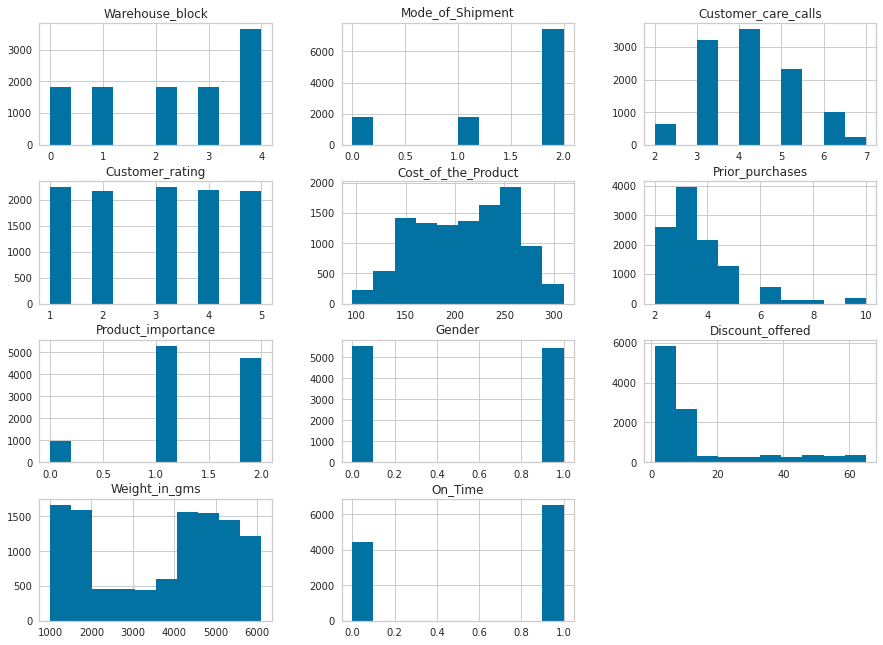

In [73]:
data.hist(figsize=(15,11))
plt.show()

<Figure size 1440x1440 with 0 Axes>

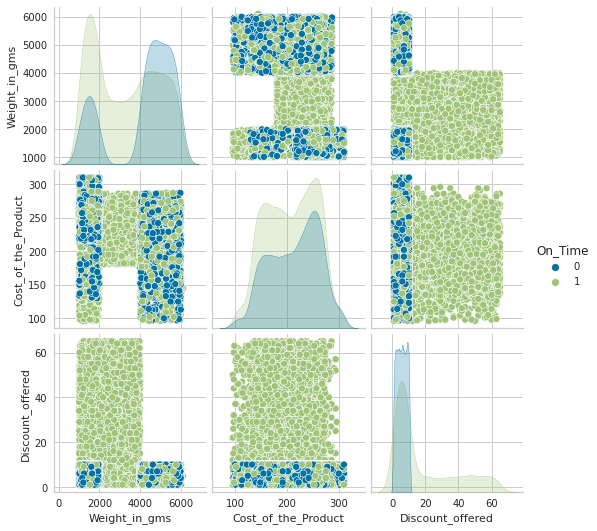

In [74]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(dataVis,hue="On_Time",vars=["Weight_in_gms","Cost_of_the_Product",
                                        "Discount_offered"])
plt.show()

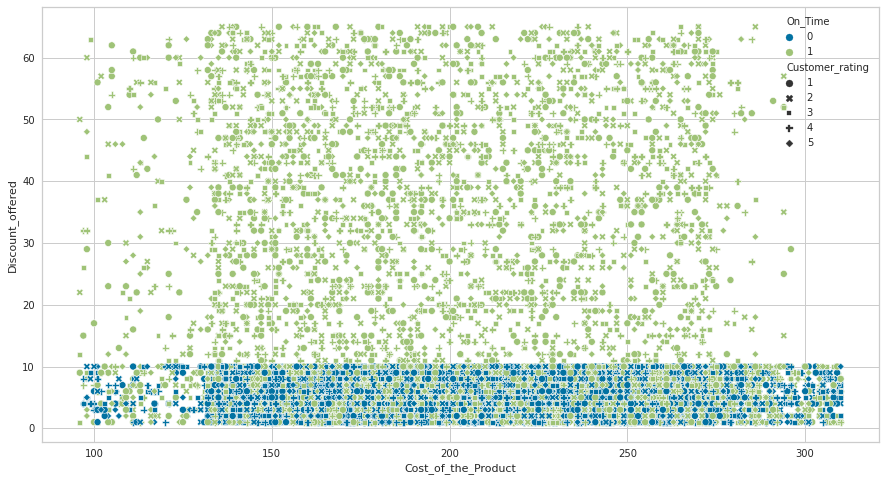

In [75]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="Cost_of_the_Product",y="Discount_offered",hue="On_Time",style="Customer_rating",
               data=dataVis)
plt.show()

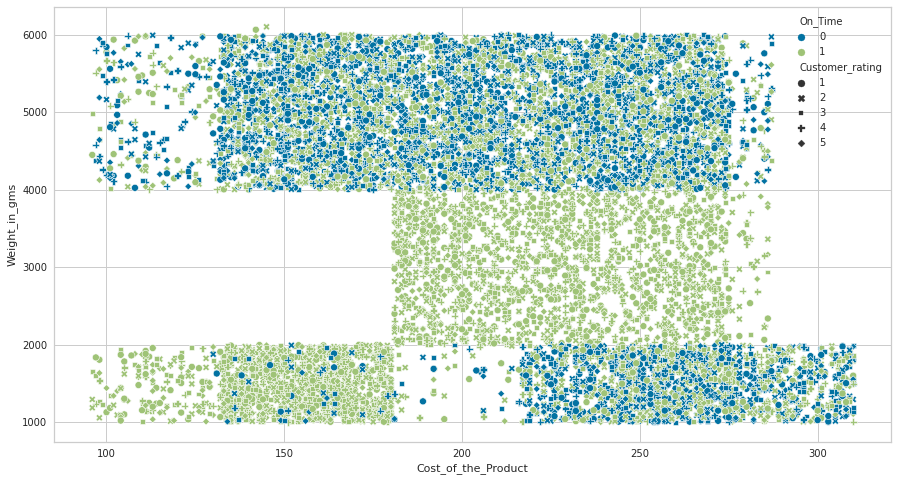

In [76]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="Cost_of_the_Product",y="Weight_in_gms",hue="On_Time",style="Customer_rating",
               data=dataVis)
plt.show()

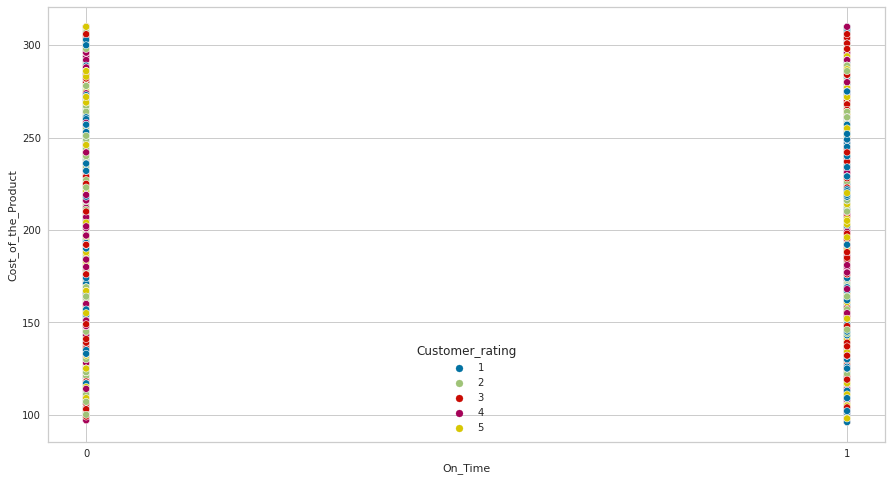

In [77]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="On_Time",y="Cost_of_the_Product",hue="Customer_rating",
               data=dataVis)
plt.xticks([0,1])
plt.show()

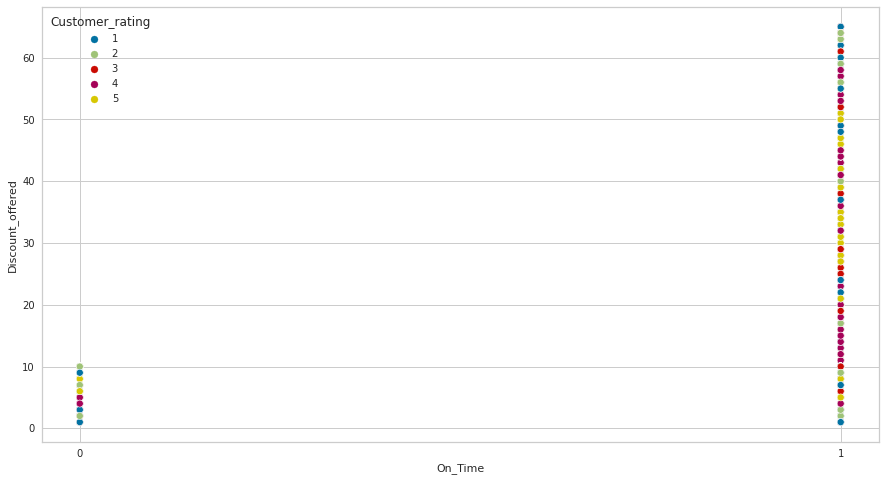

In [78]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="On_Time",y="Discount_offered",hue="Customer_rating",
               data=dataVis)
plt.xticks([0,1])
plt.show()

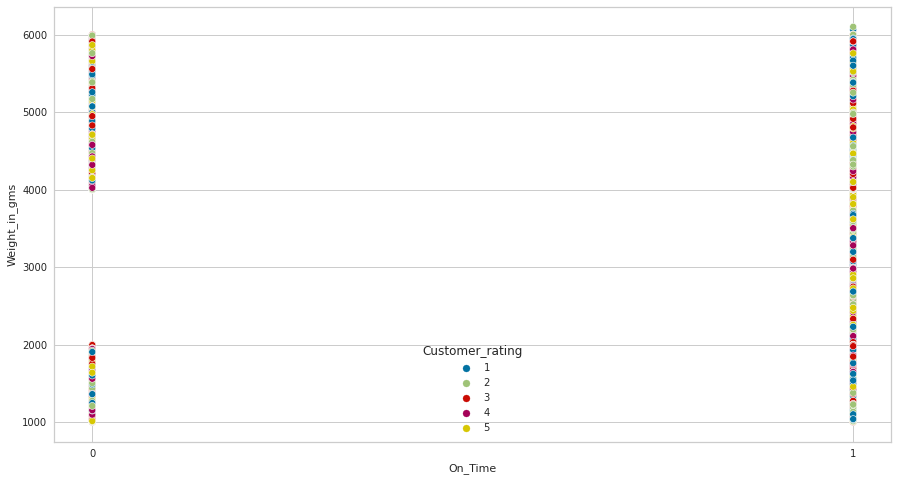

In [79]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="On_Time",y="Weight_in_gms",hue="Customer_rating",
               data=dataVis)
plt.xticks([0,1])
plt.show()

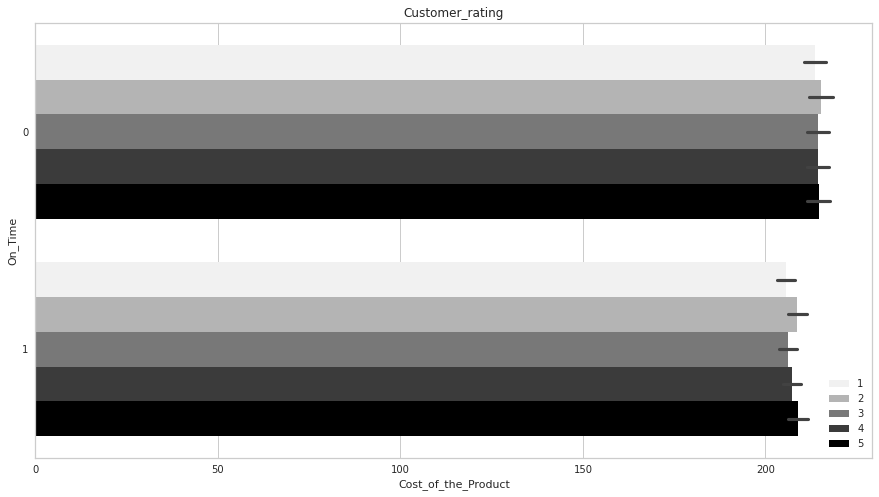

In [80]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Cost_of_the_Product",y="On_Time",
               data=dataVis,color="black",hue="Customer_rating")
plt.title("Customer_rating")
plt.legend()
plt.show()

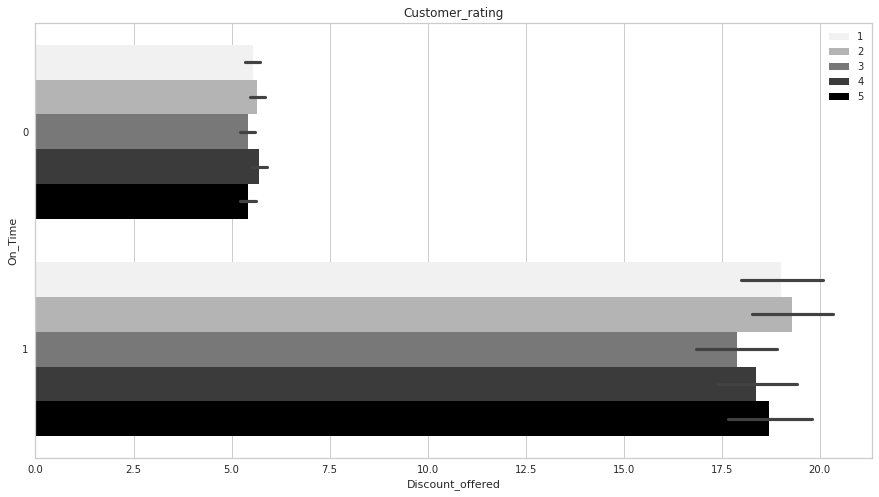

In [81]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Discount_offered",y="On_Time",
               data=dataVis,color="black",hue="Customer_rating")
plt.title("Customer_rating")
plt.legend()
plt.show()

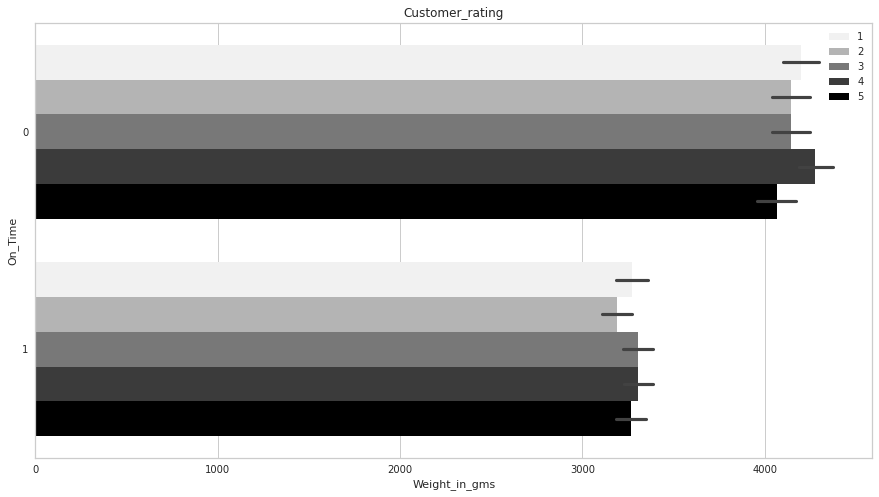

In [82]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Weight_in_gms",y="On_Time",
               data=dataVis,color="black",hue="Customer_rating")
plt.title("Customer_rating")
plt.legend()
plt.show()

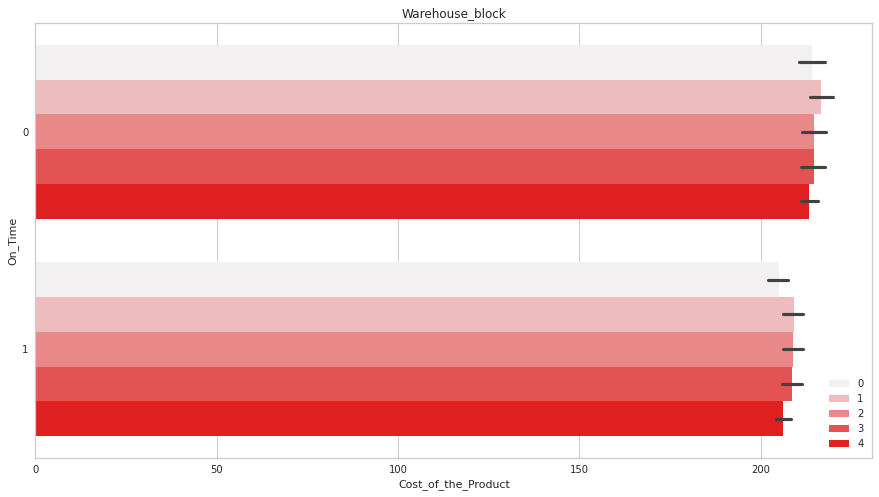

In [83]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Cost_of_the_Product",y="On_Time",
               data=dataVis,color="red",hue="Warehouse_block")
plt.title("Warehouse_block")
plt.legend()
plt.show()

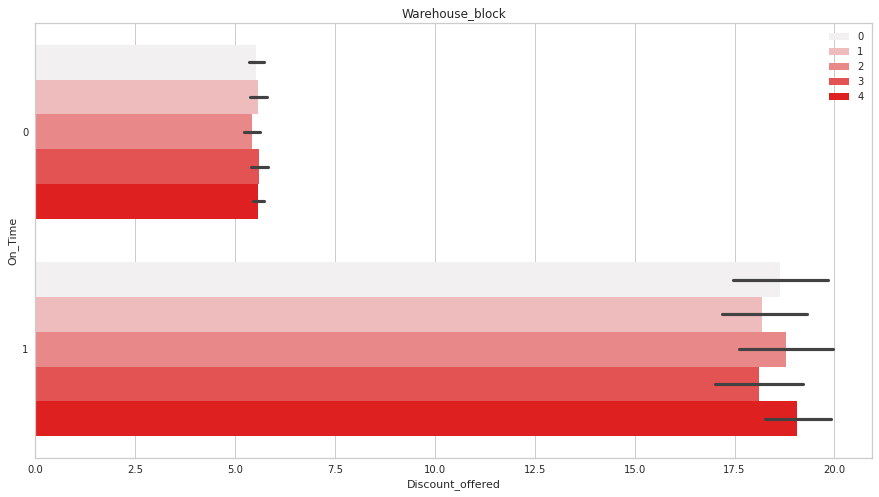

In [84]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Discount_offered",y="On_Time",
               data=dataVis,color="red",hue="Warehouse_block")
plt.title("Warehouse_block")
plt.legend()
plt.show()

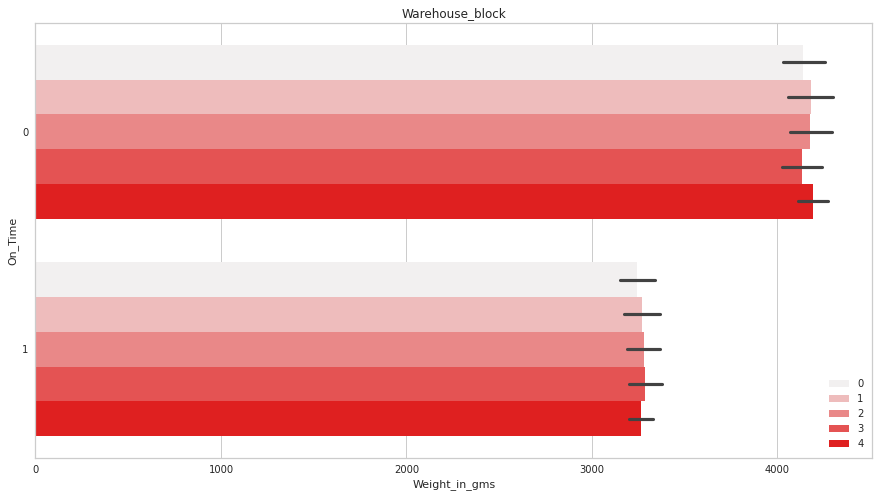

In [85]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Weight_in_gms",y="On_Time",
               data=dataVis,color="red",hue="Warehouse_block")
plt.title("Warehouse_block")
plt.legend()
plt.show()

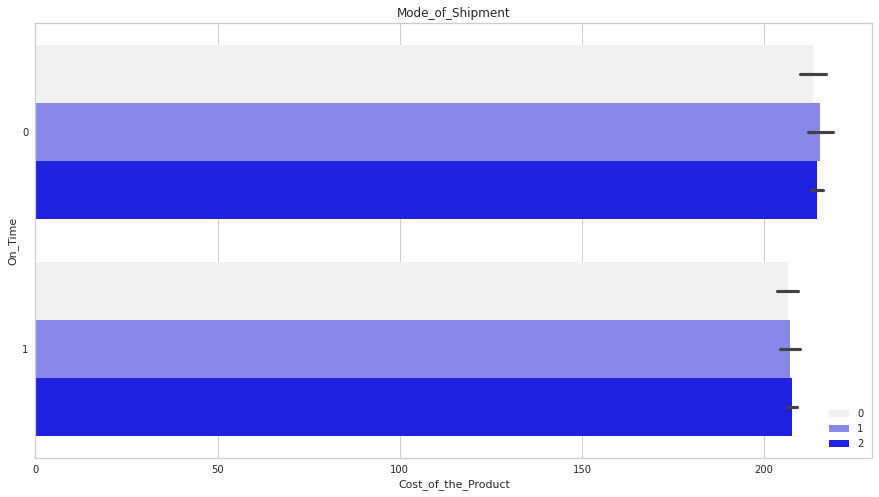

In [86]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Cost_of_the_Product",y="On_Time",
               data=dataVis,color="blue",hue="Mode_of_Shipment")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

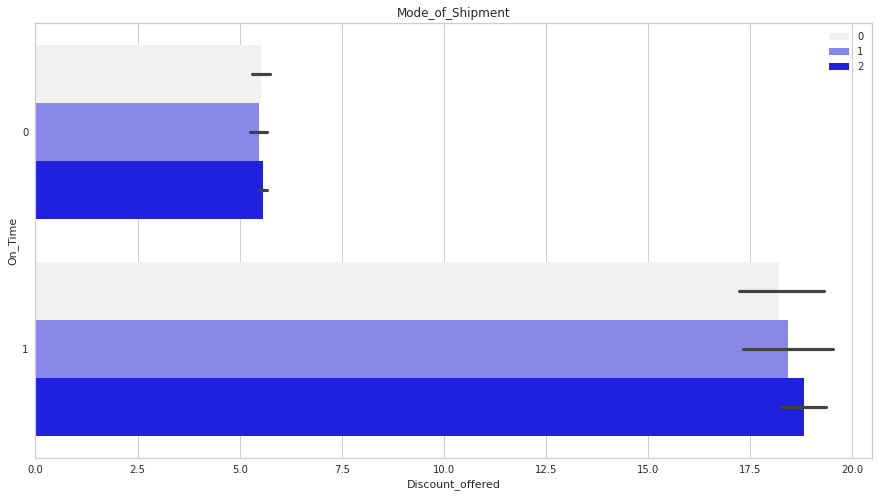

In [87]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Discount_offered",y="On_Time",
               data=dataVis,color="blue",hue="Mode_of_Shipment")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

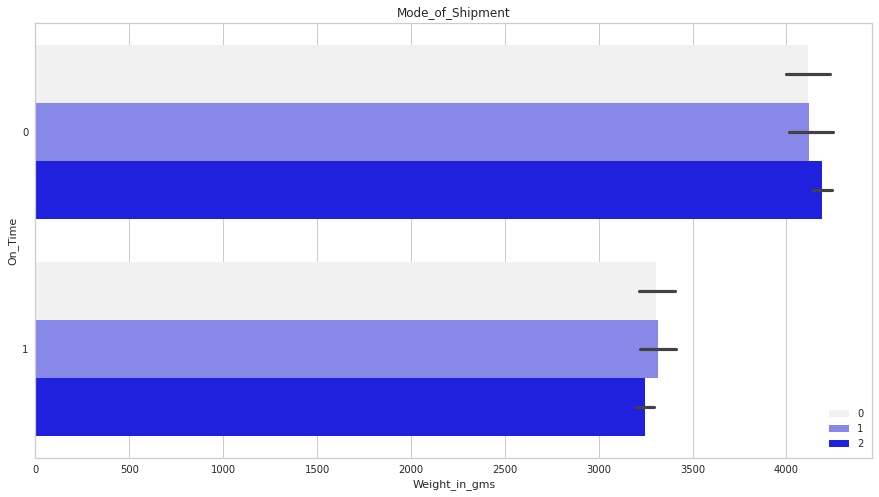

In [88]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Weight_in_gms",y="On_Time",
               data=dataVis,color="blue",hue="Mode_of_Shipment")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

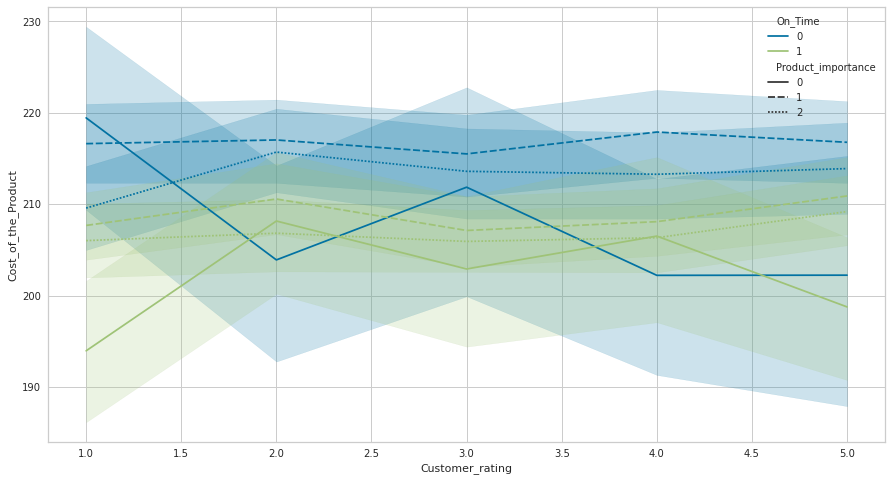

In [89]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Customer_rating",y="Cost_of_the_Product",hue="On_Time",style="Product_importance",data=dataVis)
plt.show()

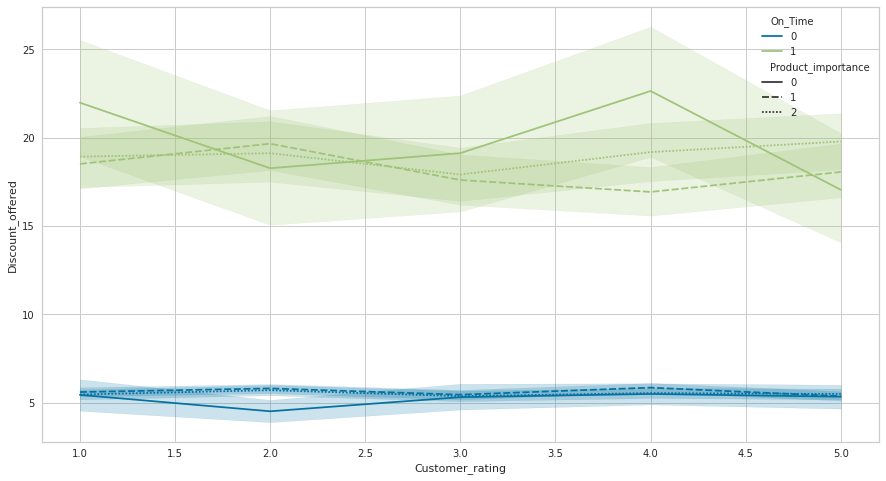

In [90]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Customer_rating",y="Discount_offered",hue="On_Time",style="Product_importance",data=dataVis)
plt.show()

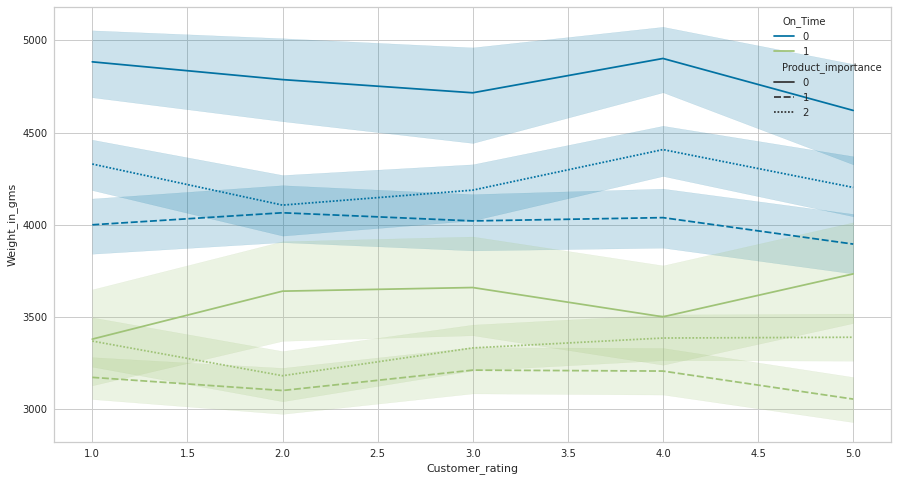

In [91]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Customer_rating",y="Weight_in_gms",hue="On_Time",style="Product_importance",data=dataVis)
plt.show()

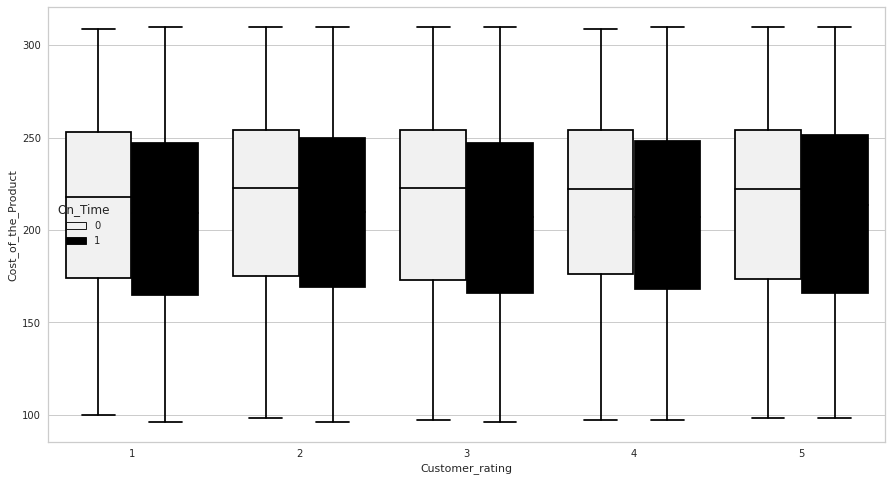

In [92]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Cost_of_the_Product",hue="On_Time",color="black",data=dataVis)
plt.show()

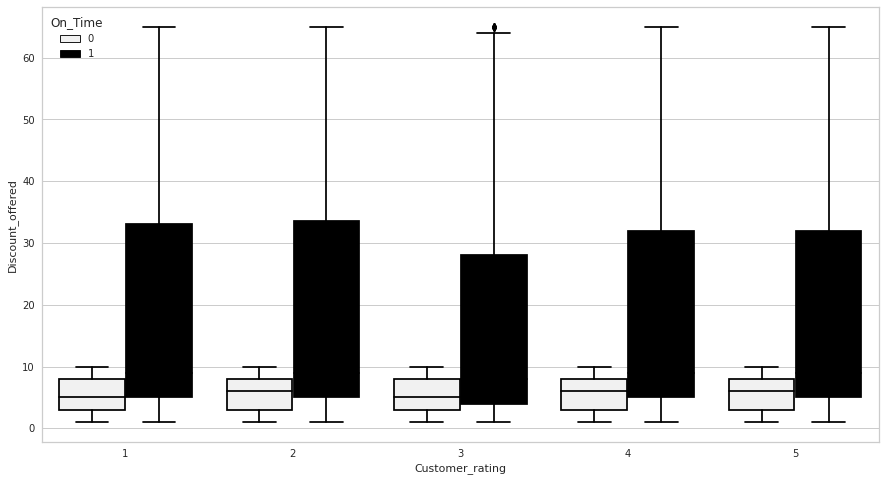

In [93]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Discount_offered",hue="On_Time",color="black",data=dataVis)
plt.show()

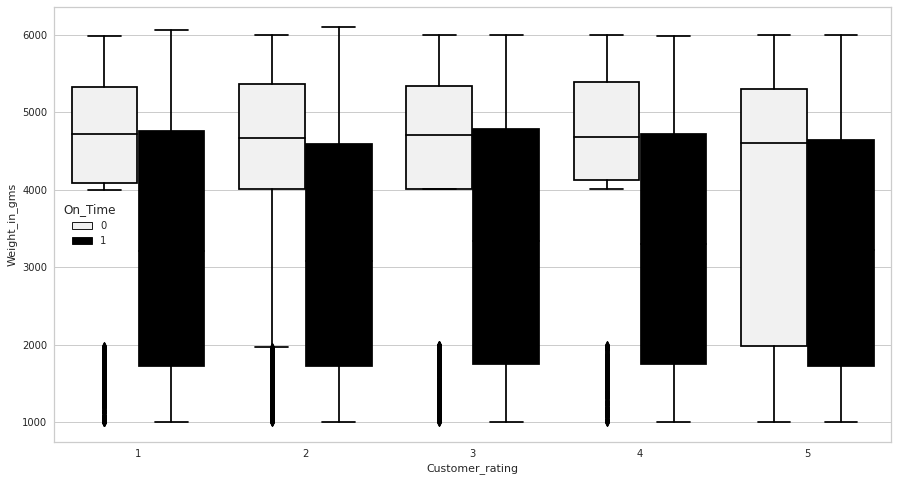

In [94]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Weight_in_gms",hue="On_Time",color="black",data=dataVis)
plt.show()

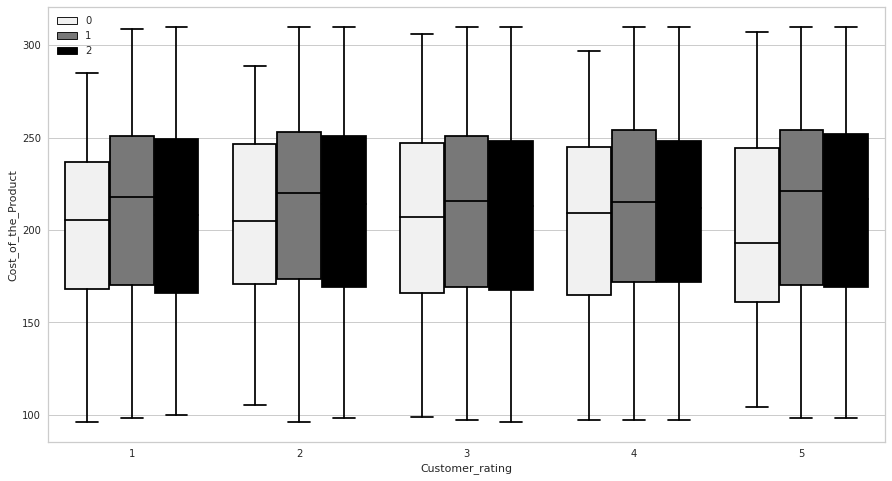

In [95]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Cost_of_the_Product",hue="Product_importance",color="black",data=dataVis)
plt.legend()
plt.show()

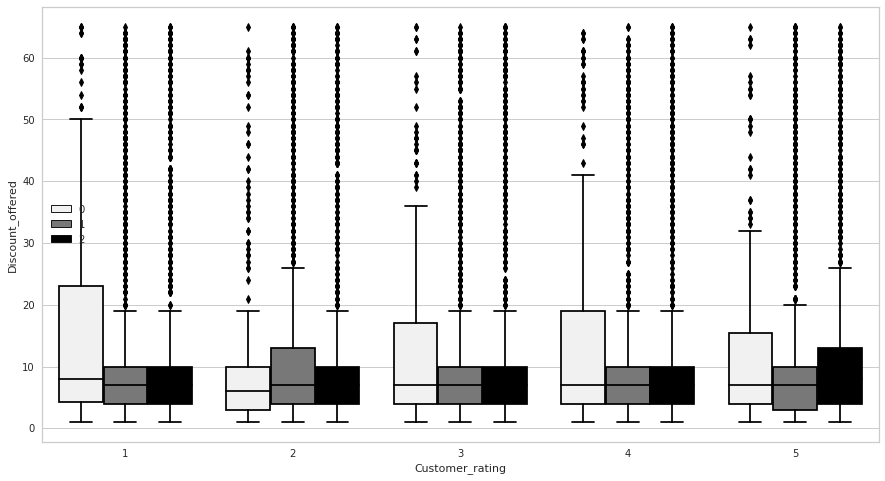

In [96]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Discount_offered",hue="Product_importance",color="black",data=dataVis)
plt.legend()
plt.show()

#### we need to make Discount_offered and Customer_rating standardize

# STANDARDIZATION

In [97]:
import statsmodels.stats.api as sms

#### for Customer_rating

In [98]:
print(data["Customer_rating"].mode())
print(data["Customer_rating"].max())
print(data["Customer_rating"].min())
print(data["Customer_rating"].mean())
print(sms.DescrStatsW(data["Customer_rating"]).tconfint_mean())

0    3
dtype: int64
5
1
2.990448467206404
(2.9640174157017847, 3.0168795187110233)


In [99]:
def func(x):
    if x < 2.99:
        return "BAD"
    else:
        return "GOOD"

In [100]:
data["Customer_rating"] = data["Customer_rating"].apply(lambda x: func(x))

In [101]:
print(data["Customer_rating"].value_counts())

GOOD    6595
BAD     4398
Name: Customer_rating, dtype: int64


In [102]:
data["Customer_rating"] = encode.fit_transform(data["Customer_rating"])

In [103]:
print(data["Customer_rating"].value_counts())

1    6595
0    4398
Name: Customer_rating, dtype: int64


#### for Discount_offered

In [104]:
print(data["Discount_offered"].mode())
print(data["Discount_offered"].max())
print(data["Discount_offered"].min())
print(data["Discount_offered"].mean())
print(sms.DescrStatsW(data["Discount_offered"]).tconfint_mean())

0    10
dtype: int64
65
1
13.362230510324752
(13.059329677044607, 13.665131343604896)


In [105]:
def funcforD(x):
    if x < 13.36:
        return "LESS"
    elif 13.36 < x > 30:
        return "NORMAL"
    else:
        return "TOO MUCH"

In [106]:
data["Discount_offered"] = data["Discount_offered"].apply(lambda x: funcforD(x))

In [107]:
print(data["Discount_offered"].value_counts())

LESS        8514
NORMAL      1706
TOO MUCH     773
Name: Discount_offered, dtype: int64


In [108]:
data["Discount_offered"] = encode.fit_transform(data["Discount_offered"])

In [109]:
print(data["Discount_offered"].value_counts())

0    8514
1    1706
2     773
Name: Discount_offered, dtype: int64


# CONTINUE TO VISUALIZE

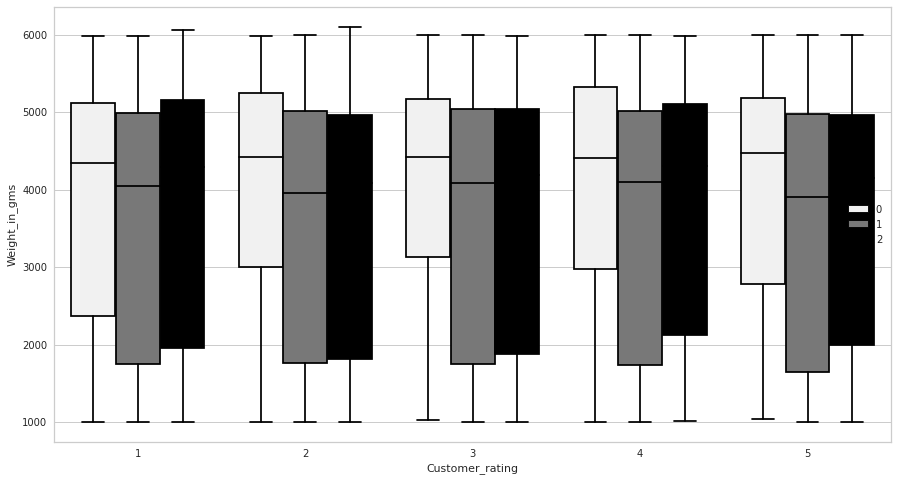

In [110]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Weight_in_gms",hue="Product_importance",color="black",data=dataVis)
plt.legend()
plt.show()

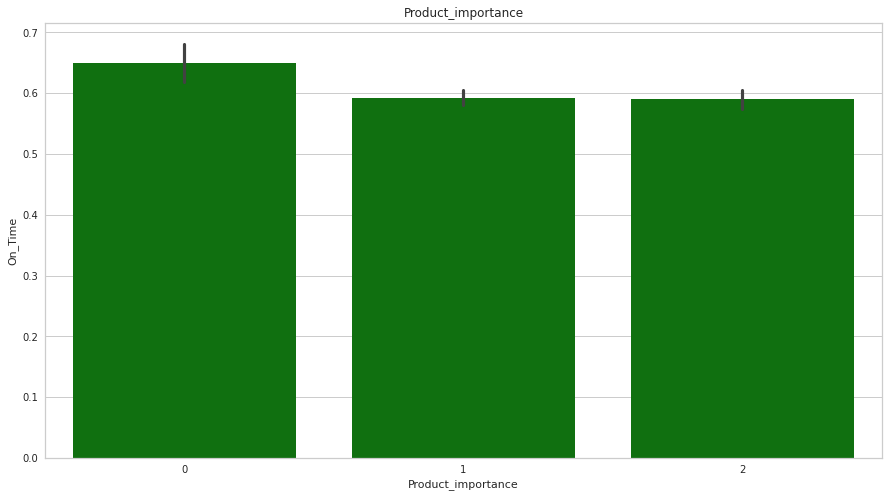

In [111]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Product_importance",y="On_Time",
               data=data,color="green")
plt.title("Product_importance")
plt.legend()
plt.show()

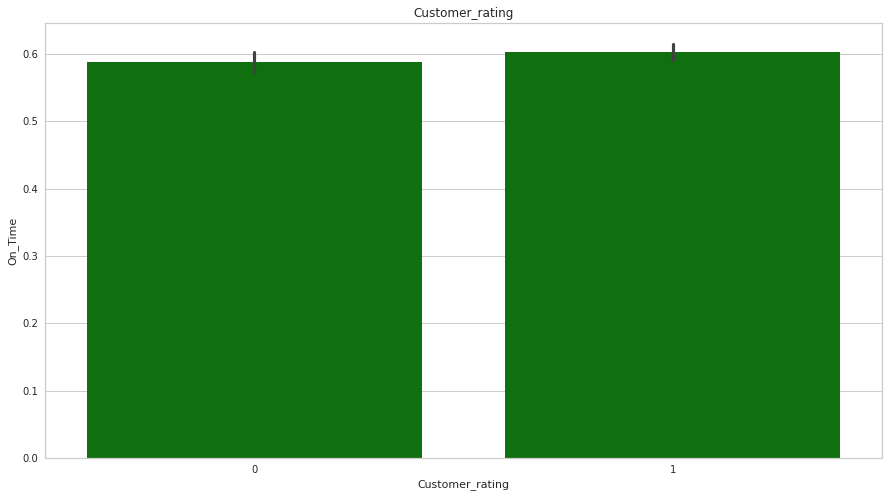

In [112]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Customer_rating",y="On_Time",
               data=data,color="green")
plt.title("Customer_rating")
plt.legend()
plt.show()

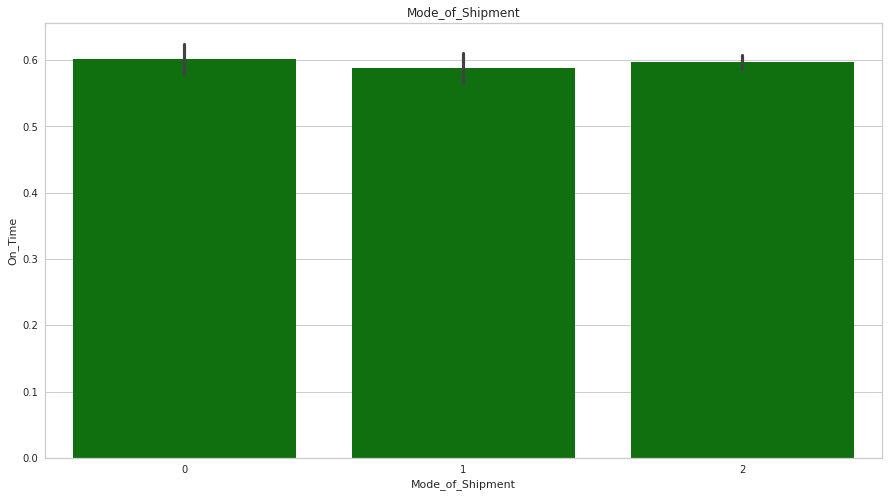

In [113]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Mode_of_Shipment",y="On_Time",
               data=data,color="green")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

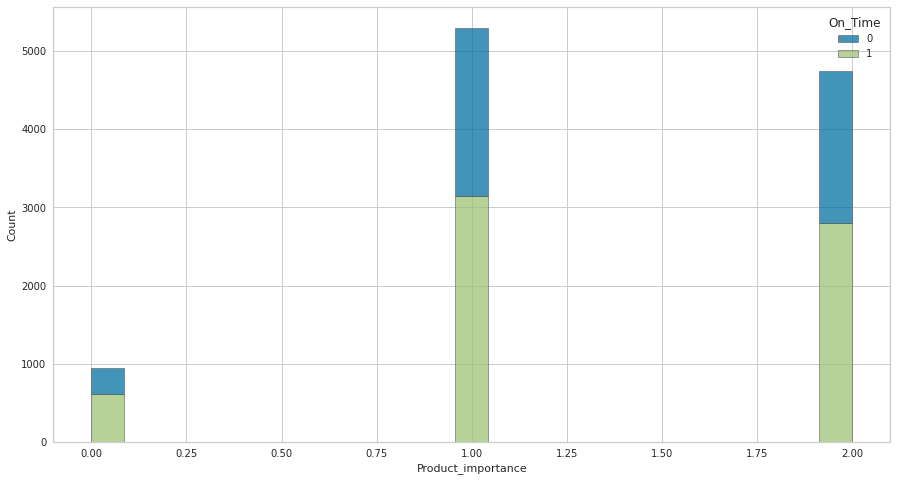

In [114]:
figure = plt.figure(figsize=(15,8))
sns.histplot(
    data,
    x="Product_importance", hue="On_Time",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)
plt.show()

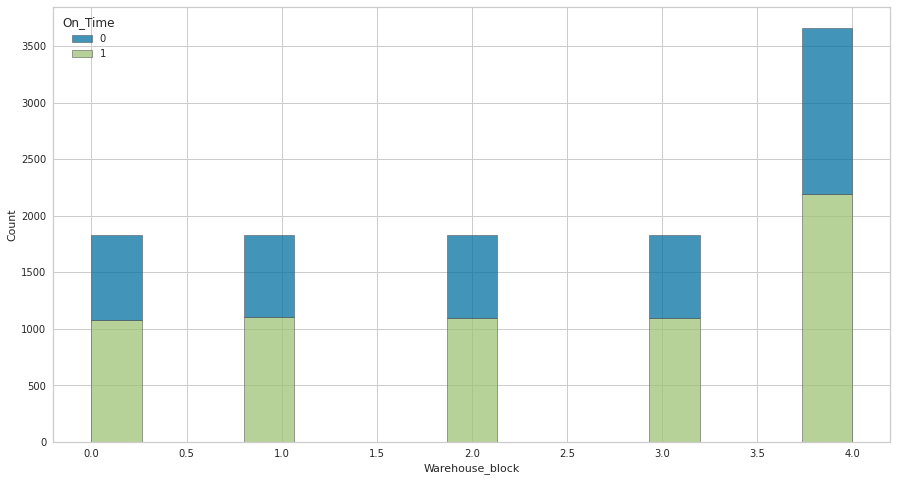

In [115]:
figure = plt.figure(figsize=(15,8))
sns.histplot(
    data,
    x="Warehouse_block", hue="On_Time",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)
plt.show()

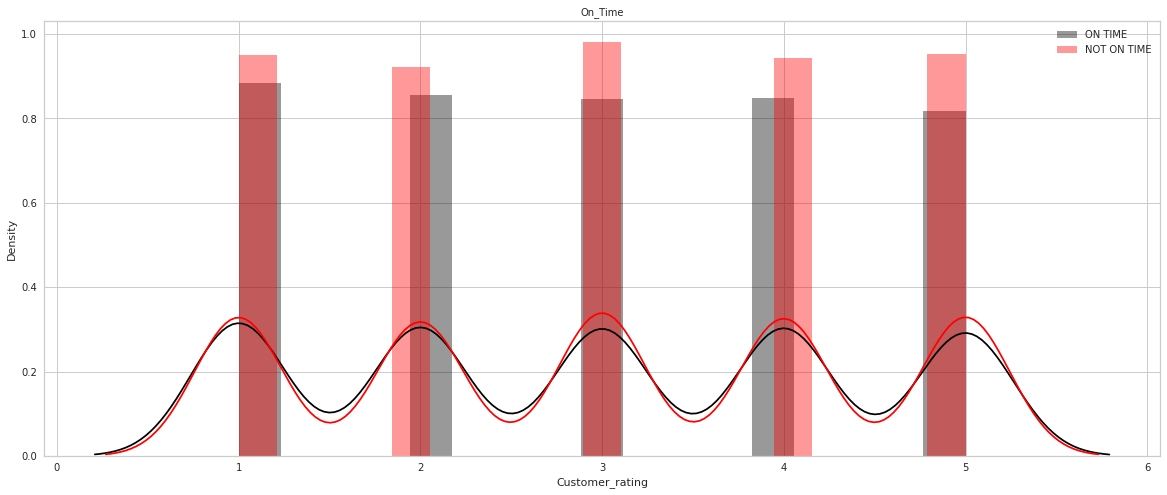

In [116]:
figure = plt.figure(figsize=(20,8))
sns.distplot(dataVis[dataVis['On_Time'] == 0]["Customer_rating"], color='black',label='ON TIME') 
sns.distplot(dataVis[dataVis['On_Time'] == 1]["Customer_rating"], color='red',label='NOT ON TIME')

plt.title('On_Time', fontsize=10)
plt.legend()

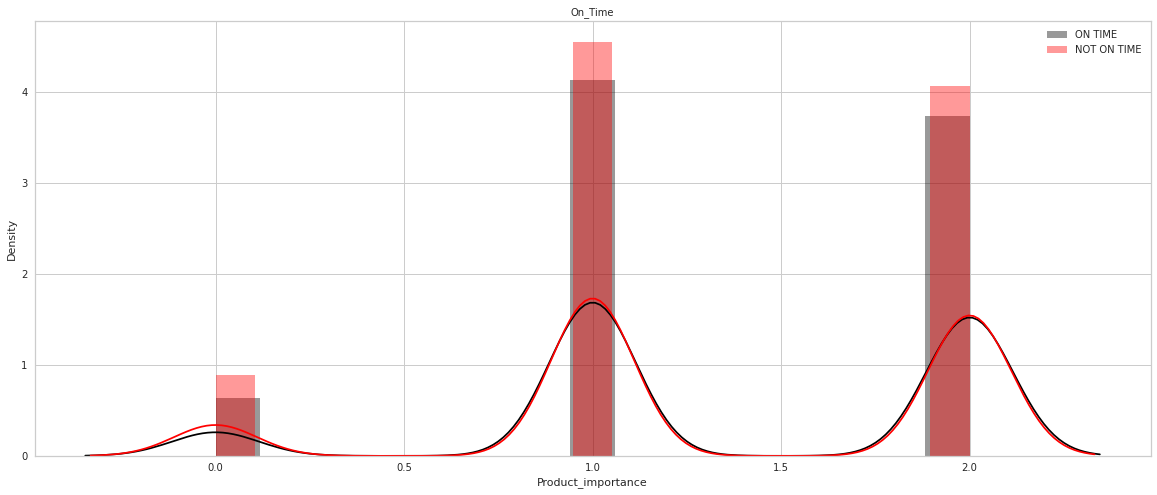

In [117]:
figure = plt.figure(figsize=(20,8))
sns.distplot(dataVis[dataVis['On_Time'] == 0]["Product_importance"], color='black',label='ON TIME') 
sns.distplot(dataVis[dataVis['On_Time'] == 1]["Product_importance"], color='red',label='NOT ON TIME')

plt.title('On_Time', fontsize=10)
plt.legend()

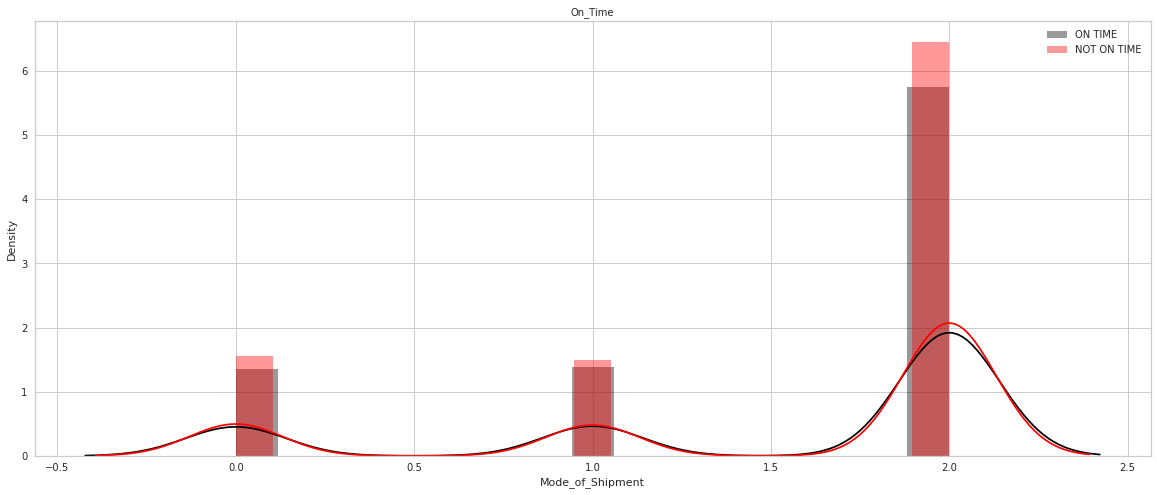

In [118]:
figure = plt.figure(figsize=(20,8))
sns.distplot(dataVis[dataVis['On_Time'] == 0]["Mode_of_Shipment"], color='black',label='ON TIME') 
sns.distplot(dataVis[dataVis['On_Time'] == 1]["Mode_of_Shipment"], color='red',label='NOT ON TIME')

plt.title('On_Time', fontsize=10)
plt.legend()

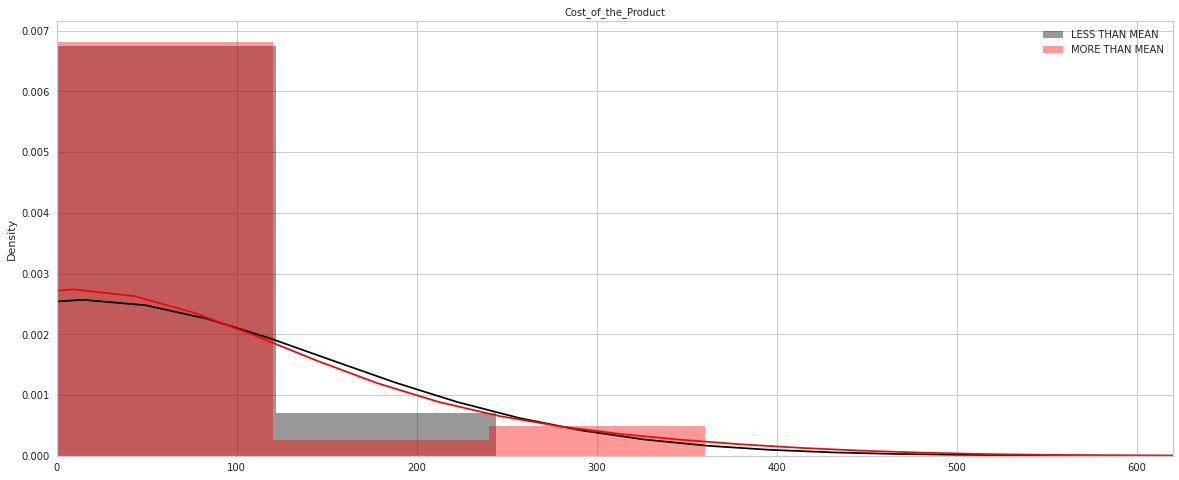

In [119]:
figure = plt.figure(figsize=(20,8))
sns.distplot(dataVis[dataVis['Cost_of_the_Product'] < dataVis['Cost_of_the_Product'].mean()], color='black',label='LESS THAN MEAN') 
sns.distplot(dataVis[dataVis['Cost_of_the_Product'] > dataVis['Cost_of_the_Product'].mean()], color='red',label='MORE THAN MEAN')

plt.xlim([0,620])
plt.title('Cost_of_the_Product', fontsize=10)
plt.legend()

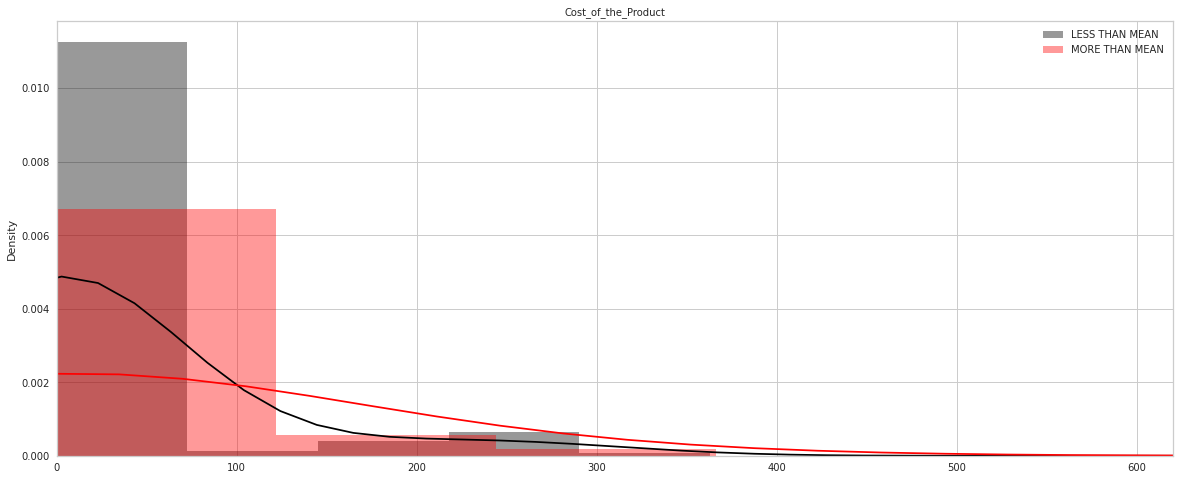

In [120]:
figure = plt.figure(figsize=(20,8))
sns.distplot(dataVis[dataVis['Weight_in_gms'] < dataVis['Weight_in_gms'].mean()], color='black',label='LESS THAN MEAN') 
sns.distplot(dataVis[dataVis['Weight_in_gms'] > dataVis['Weight_in_gms'].mean()], color='red',label='MORE THAN MEAN')

plt.xlim([0,620])
plt.title('Cost_of_the_Product', fontsize=10)
plt.legend()

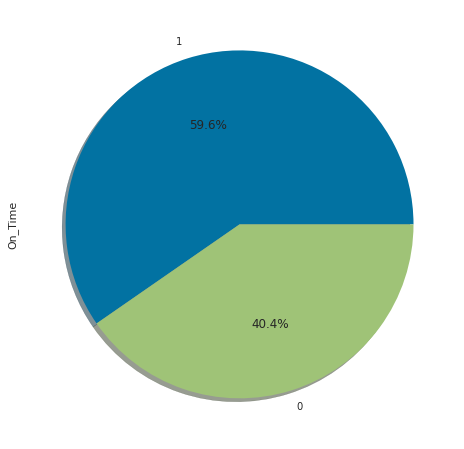

In [121]:
data['On_Time'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))
plt.show()

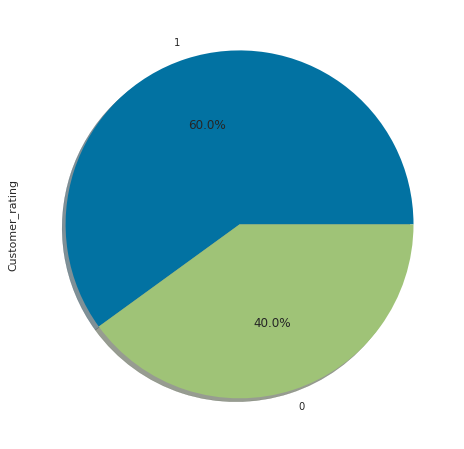

In [122]:
data['Customer_rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))
plt.show()

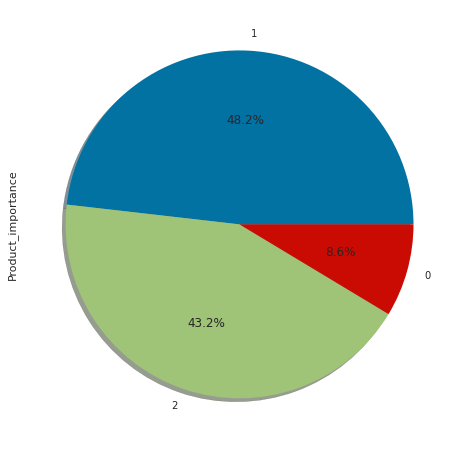

In [123]:
data['Product_importance'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))
plt.show()

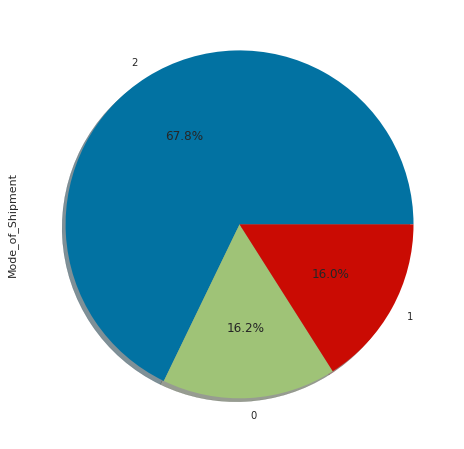

In [124]:
data['Mode_of_Shipment'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))
plt.show()

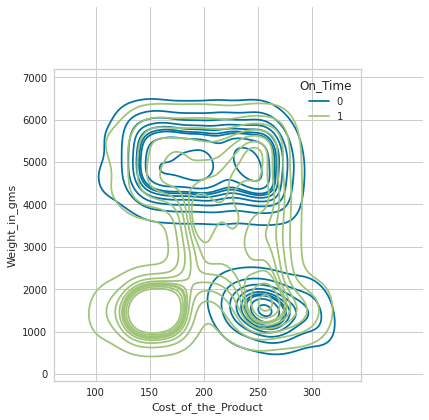

In [125]:
g = sns.JointGrid(data=data, x="Cost_of_the_Product", y="Weight_in_gms", hue="On_Time", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

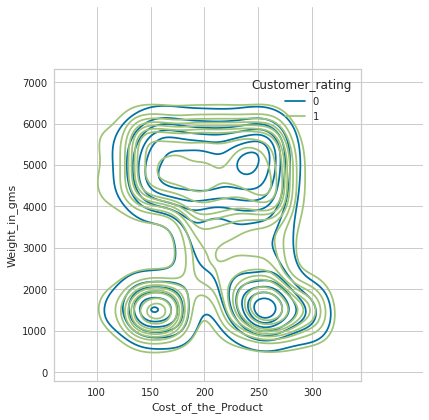

In [126]:
g = sns.JointGrid(data=data, x="Cost_of_the_Product", y="Weight_in_gms", hue="Customer_rating", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

# TRAIN & TEST 

In [127]:
x = data.drop(["On_Time"],axis=1)
y = data["On_Time"]

In [128]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [129]:
print(xTrain.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [130]:
print(yTrain)

5855    1
4714    1
8683    1
298     1
3463    1
       ..
5740    1
5197    0
5396    0
866     1
7276    1
Name: On_Time, Length: 8794, dtype: int64


In [131]:
print(xTest.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [132]:
print(yTest)

107      1
5484     0
8445     1
10061    0
5665     1
        ..
10548    1
5809     0
7488     1
4632     0
5937     0
Name: On_Time, Length: 2199, dtype: int64


# CLASSIFIER MODELS

In [133]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

[12:28:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [134]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]

In [135]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    roc = roc_curve(yTest,predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("ROC-->",roc)
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.6762164620281946
R2CV--> 0.6780282274802822
MEAN SQUARED ERROR--> 0.5674255656204765
ROC--> (array([0.        , 0.33369923, 1.        ]), array([0.        , 0.68322981, 1.        ]), array([2, 1, 0]))
------------------------------
GaussianNB: 
----------
ACC--> 0.6384720327421555
R2CV--> 0.6384786218347861
MEAN SQUARED ERROR--> 0.6012664784978569
ROC--> (array([0., 0., 1.]), array([0.        , 0.38276398, 1.        ]), array([2, 1, 0]))
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.669849931787176
R2CV--> 0.6634744707347446
MEAN SQUARED ERROR--> 0.5801082047904988
ROC--> (array([0.        , 0.36772777, 1.        ]), array([0.        , 0.69642857, 1.        ]), array([2, 1, 0]))
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.647112323783538
R2CV--> 0.6512079701120796
MEAN SQUARED ERROR--> 0.5905861748194926
ROC--> (array([0.        , 0.46652031, 1.        ]), array([0.        , 0.72748447,

# CNN

In [136]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [137]:
mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
print(R2CV)
error = -cross_val_score(mlpc,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.6453030303030303
0.6054032341878681


# LOGIT

In [138]:
logg = sm.Logit(yTrain,xTrain).fit()
print(logg.summary())

         Current function value: 0.532926
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                On_Time   No. Observations:                 8794
Model:                          Logit   Df Residuals:                     8784
Method:                           MLE   Df Model:                            9
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.2085
Time:                        12:31:08   Log-Likelihood:                -4686.6
converged:                      False   LL-Null:                       -5921.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Warehouse_block         0.0195      0.016      1.206      0.228      -0.012       0.051
Mode_of_Shipment        0.0450      0.

#### best is GradientBoostingClassifier: 
----------
* ACC--> 0.70

# GRADIENT BOOST CLASSIFIER TUNING

#### LOCAL TESTING

In [139]:
paramsLR = {"learning_rate": [0.001, 0.01, 0.1, 0.2]}

In [140]:
cv = GridSearchCV(gbmc,paramsLR,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)

{'learning_rate': 0.1}


In [145]:
gbmcL = GradientBoostingClassifier(learning_rate=0.1,verbose=False).fit(xTrain,yTrain)

R2CVL = cross_val_score(gbmcL,xTest,yTest,cv=10,verbose=False).mean()
errorL = -cross_val_score(gbmcL,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVL)
print(np.sqrt(errorL))

0.6725757575757576
0.5726070099804821


In [143]:
paramsMD = {"max_depth": [3, 5, 8, 50, 100]}

In [144]:
cvMD = GridSearchCV(gbmc,paramsMD,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cvMD.best_params_)

{'max_depth': 3}


In [146]:
gbmcMD = GradientBoostingClassifier(max_depth=3,verbose=False).fit(xTrain,yTrain)

R2CVMD = cross_val_score(gbmcMD,xTest,yTest,cv=10,verbose=False).mean()
errorMD = -cross_val_score(gbmcMD,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVMD)
print(np.sqrt(errorMD))

0.6721212121212121
0.5726070099804821


In [148]:
paramsE = {"n_estimators": [200, 500, 1000, 2000]}

In [149]:
cvE = GridSearchCV(gbmc,paramsE,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cvE.best_params_)

{'n_estimators': 200}


In [151]:
gbmcE = GradientBoostingClassifier(n_estimators=200,verbose=False).fit(xTrain,yTrain)

R2CVE = cross_val_score(gbmcE,xTest,yTest,cv=10,verbose=False).mean()
errorE = -cross_val_score(gbmcE,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVE)
print(np.sqrt(errorE))

0.6644022415940224
0.5800921041654235


In [152]:
gbmcGen = GradientBoostingClassifier(n_estimators=200,max_depth=3,learning_rate=0.1,verbose=False).fit(xTrain,yTrain)

R2CGE = cross_val_score(gbmcGen,xTest,yTest,cv=10,verbose=False).mean()
errorGE = -cross_val_score(gbmcGen,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CGE)
print(np.sqrt(errorGE))

0.6644022415940224
0.5789155490669016


#### GENERAL TESTING

In [153]:
gparams = {"learning_rate": [0.0001, 0.01, 0.1],
          "max_depth": [3, 5, 8],
          "n_estimators": [200, 500, 1000, 2000]}

In [154]:
cvGEN = GridSearchCV(gbmc,gparams,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cvGEN.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [155]:
gbmcLast = GradientBoostingClassifier(n_estimators=200,max_depth=5,learning_rate=0.01,verbose=False).fit(xTrain,yTrain)

R2CVlast = cross_val_score(gbmcLast,xTest,yTest,cv=10,verbose=False).mean()
errorlast = -cross_val_score(gbmcLast,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVlast)
print(np.sqrt(errorlast))

0.6775778331257782
0.5678223021986911


#### ANOTHER TESTING

In [156]:
gbmcH = GradientBoostingClassifier(min_samples_split=500,
                                   min_samples_leaf=50,
                                   subsample=0.8,
                                   max_features="sqrt",n_estimators=200,max_depth=8,learning_rate=0.01,verbose=False).fit(xTrain,yTrain)

R2CVH = cross_val_score(gbmcH,xTest,yTest,cv=10,verbose=False).mean()
errorH = -cross_val_score(gbmcH,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVH)
print(np.sqrt(errorH))

0.6934931506849316
0.5519823515266091


In [157]:
gbmcH2 = GradientBoostingClassifier(min_samples_split=500,
                                   min_samples_leaf=50,
                                   subsample=0.8,
                                   max_features="sqrt",verbose=False).fit(xTrain,yTrain)

R2CVH2 = cross_val_score(gbmcH2,xTest,yTest,cv=10,verbose=False).mean()
errorH2 = -cross_val_score(gbmcH2,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVH2)
print(np.sqrt(errorH2))

0.6843980904939809
0.5678186469060171


In [158]:
paramtest2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

In [159]:
cvH = GridSearchCV(gbmc,paramtest2,cv=5,verbose=False,n_jobs=-1,scoring="roc_auc").fit(xTrain,yTrain)
print(cvH.best_params_)
print(cvH.best_estimator_)
print(cvH.best_score_)
print(cvH.cv_results_)

{'max_depth': 5, 'min_samples_split': 800}
GradientBoostingClassifier(max_depth=5, min_samples_split=800, verbose=False)
0.7438857239052824
{'mean_fit_time': array([1.64914556, 1.60639601, 1.59183998, 1.58174825, 1.56018829,
       2.18045793, 2.10439134, 2.31782141, 2.04924898, 2.02028413,
       2.65292935, 2.56395702, 2.54127407, 2.43948016, 2.39075198,
       3.11848111, 2.98752308, 3.1437562 , 2.87768888, 2.75560122,
       3.55365739, 3.41577239, 3.28791084, 3.18020816, 3.08954239,
       4.23557572, 3.82058363, 3.63208146, 3.51883888, 3.12202654]), 'std_fit_time': array([0.00220253, 0.00716906, 0.00647106, 0.0063376 , 0.0148796 ,
       0.02518138, 0.00671217, 0.13006309, 0.0321382 , 0.04526238,
       0.0224067 , 0.00573509, 0.01837932, 0.01554028, 0.02238742,
       0.03230436, 0.02793958, 0.15398381, 0.08389579, 0.04759316,
       0.02557126, 0.0412349 , 0.04125578, 0.02056248, 0.05375931,
       0.08514826, 0.02836725, 0.04148657, 0.03557322, 0.37905336]), 'mean_score_time':

In [167]:
gbmcH3 = GradientBoostingClassifier(min_samples_split=800,
                                   min_samples_leaf=50,
                                   subsample=0.8,
                                   max_features="sqrt",n_estimators=1000,max_depth=5,learning_rate=0.02,verbose=False).fit(xTrain,yTrain)

R2CVH3 = cross_val_score(gbmcH3,xTest,yTest,cv=10,verbose=False).mean()
errorH3 = -cross_val_score(gbmcH3,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVH3)
print(np.sqrt(errorH3))

0.6830323785803237
0.5658229990478972


In [161]:
gbmcH4 = GradientBoostingClassifier(min_samples_split=800,
                                   max_features="sqrt",max_depth=5,verbose=False).fit(xTrain,yTrain)

R2CVH4 = cross_val_score(gbmcH4,xTest,yTest,cv=10,verbose=False).mean()
errorH4 = -cross_val_score(gbmcH4,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVH4)
print(np.sqrt(errorH4))

0.6807492735574927
0.5646203866209241
